Nhờ các mô hình nhiễu mà người ta tính được các nhiễu trong ảnh. Nhờ tính được các nhiễu này mà xoá được các nhiễu khỏi ảnh.

Trong thực tế, không thể tính được mô hình nhiễu vì mất nhiều thời gian để tính toán. Vì thế cần tới phương pháp giảm nhiễu bằng bộ lọc
- Lọc trên miền không gian (Spatial) - Ảnh gốc
    + Lọc tuyến tính: Lấy giá trị xung quanh để tính giá trị điểm giữa trên 1 mặt nạ lọc - Kernel (Ma trận 3x3 chẳn hạn): Blur / GaussianBlur
    + Lọc phi tuyến tính: Không dùng các giá trị trị xung quanh: Median, Min, Max, Mode, Q1, Q2(Median), Q3 của tứ phân vị (Quartiles)
- Lọc trên miền tần số (Frequency) - Ảnh xử lý bằng cách đếm tần số xuất hiện của điểm ảnh
    + Lọc các điểm có tần số cao: HiPass Filter
    + Lọc các điểm có tần số thấp: LowPass Filter

#### Lọc tuyến tính trên miền không gian sử dụng mặt nạ - Kernel
Dùng để xử lý ảnh bằng cách áp mặt nạ (ma trận 3x3 chẳn hạn). Giá trị cường độ sáng của điểm ảnh tại tâm kernel được tính bằng trung bình của tổng tất cả các điểm ảnh được áp mặt nạ nhân với giá trị tương ứng trên mặt nạ (Convolution)

Thao tác cơ bản:
- Xây dựng 1 kernel/mask/template/window chứa các hệ số $w$
- Di chuyển kernel đến từng pixel $f(x,y)$ của ảnh
- Thay đổi giá trị pixel ở tâm của kernel dùng phép toán tổng của tích

$$
\begin{array}{r}
g(x, y)=w(-1,-1) f(x-1, y-1)+w(-1,0) f(x-1, y)+\ldots \\
+w(0,0) f(x, y)+\ldots+w(1,1) f(x+1, y+1)
\end{array}
$$

<image src="Image\Apply Kernel.gif" width="70%" style="display: block; margin: 0 auto">


##### Box kernel (Average filter):
Là một ma trận N x N với tất cả các giá trị trong ma trận đều bằng 1. Điều này có nghĩa là khi áp dụng Kernel này lên ảnh gốc thì điểm ảnh mới sẽ được tính bằng giá trị trung bình của tất cả các điểm ảnh lân cận

Ví dụ Box kernel 3 x 3

<image src="Image\Box Kernel 3x3.png" width="30%" style="display: block; margin: 0 auto">

##### Gaussian kernel:

Gausian kernel được sử dụng để tính giá trị điểm ảnh trung tâm kernel một cách tự nhiên hơn bằng cách xác định sự đóng góp của các điểm ảnh lân cận vào kết quả thông qua khoảng cách từ điểm ảnh đó đến tâm, càng xa thì trọng số càng thấp tức là sự ảnh hưởng càng thấp.

Các giá trị trên Gaussian kernel được tính theo công thức:

$$
G(x, y)=\frac{1}{2 \pi \sigma^2} e^{-\frac{x^2+y^2}{2 \sigma^2}}
$$

Trong đó:
- $x$ và $y$ là toạ độ trên kernel (Tâm kernel có $x = 0$ và $y = 0$)
- $\sigma$ là phương sai
- $\sigma^2$ là độ lệch chuẩn
- $\sigma$ thường được chọn là 1

Ví dụ một Gaussian kernel 3 x 3:

<image src="Image\Gaussian Kernel 3x3.png" width="30%" style="display: block; margin: 0 auto">

Gaussian kernel 3 x 3 xem ở chế độ 3D:

<image src="Image\Gaussian Kernel 3D view.png" width="50%" style="display: block; margin: 0 auto">

#### Lọc phi tuyến trên miền không gian:
Thay vì sử dụng các điểm ảnh lân cận để tính ra giá trị của điểm ảnh giữa thì người ta xác định giá trị điểm ảnh giữa bằng cách lấy 1 điểm ảnh nào đó ở lân cận mà được cho là phù hợp nhất (Có thể là trung vị - Median hay giá trị phổ biến nhất - model, ...)

##### Median filter
- Tạo 1 Box N x N
- Lấy tất cả điểm ảnh trong Box cho vào 1 mảng
- Sắp xếp mảng tăng hoặc giảm dần
- Lấy ra giá trị của phần tử giữa mảng thay vào điểm ảnh giữa

<image src="Image\Median filter.png" width="90%" style="display: block; margin: 0 auto">

#### Tác dụng của việc xử lý nhiễu:
- Nâng cấp chất lượng ảnh
    + Làm các chi tiết nổi bật hơn
    + Làm ảnh mờ hơn (giảm nhiễu)

#### Bài tập
Viết Function thay cho 2 hàm Bur và GaussianBlur -> Nộp qua Zalo cho thầy.

[[0.01831564 0.082085   0.13533528 0.082085   0.01831564]
 [0.082085   0.36787944 0.60653066 0.36787944 0.082085  ]
 [0.13533528 0.60653066 1.         0.60653066 0.13533528]
 [0.082085   0.36787944 0.60653066 0.36787944 0.082085  ]
 [0.01831564 0.082085   0.13533528 0.082085   0.01831564]]


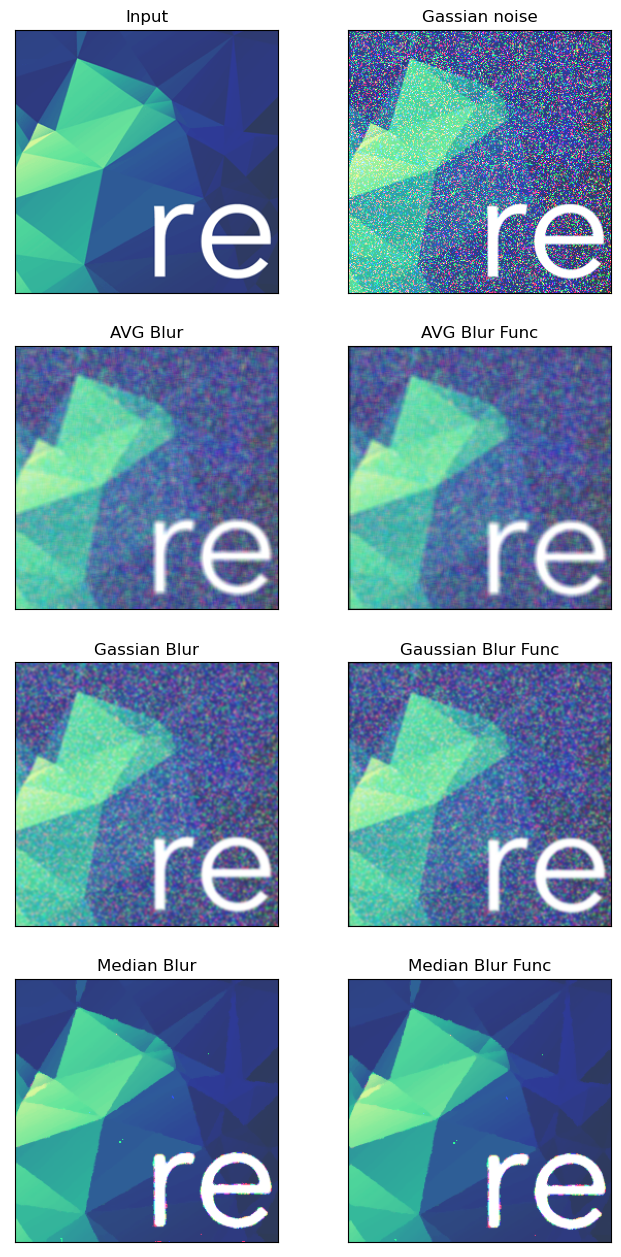

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

def Show(pos, image, name, gray=False, hideTisks=False):
    plt.subplot(pos)
    if gray:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(name)
    if hideTisks:
        plt.xticks([]), plt.yticks([])

def CalcCenterMedian(img, kernelSize, x, y):
    (B, G, R, size) = ([], [], [], 0)
    for i in range(kernelSize):
        for j in range(kernelSize):
            x1 = x - (kernelSize+1) // 2 + i
            y1 = y - (kernelSize+1) // 2 + j
            if x1 >= 0 and x1 < img.shape[0] and y1 >= 0 and y1 < img.shape[1]:
                B.append(img[x1, y1][0])
                G.append(img[x1, y1][1])
                R.append(img[x1, y1][2])
                size += 1
    for i in range(size + 1, kernelSize*kernelSize):
        B.append(0)
        G.append(0)
        R.append(0)
    B.sort(), G.sort(), R.sort()
    mid = kernelSize*kernelSize//2
    return (B[mid], G[mid], R[mid])

def Medianblur(img, kernelSize):
    result = img.copy()
    (height, width, channel) = img.shape
    for i in range(height):
        for j in range(width):
            result[i, j] = CalcCenterMedian(img,kernelSize,i,j)
    return result

def CalcCenter(img, kernel, kernelSize, x, y):
    (B, G, R, total) = (0, 0, 0, 0)
    for i in range(kernelSize):
        for j in range(kernelSize):
            x1 = x - (kernelSize+1) // 2 + i
            y1 = y - (kernelSize+1) // 2 + j
            if x1 >= 0 and x1 < img.shape[0] and y1 >= 0 and y1 < img.shape[1]:
                B += img[x1, y1][0] * kernel[i, j]
                G += img[x1, y1][1] * kernel[i, j]
                R += img[x1, y1][2] * kernel[i, j]
            total += kernel[i, j]
    return (B//total, G//total, R//total)

def ApplyKernel(img, kernel, kernelSize):
    result = img.copy()
    (height, width, channel) = img.shape
    for i in range(height):
        for j in range(width):
            result[i, j] = CalcCenter(img,kernel,kernelSize,i,j)
    return result

def gkernel(size=3, sigma=1):
    center = (int)(size/2)
    kernel = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            diff = np.sqrt((i-center)**2+(j-center)**2)
            kernel[i, j] = np.exp(-(diff**2)/(2*sigma**2))
    return kernel

def GaussianBlur(img, kernelSize, sigma):
    center = (int)(kernelSize/2)
    kernel = np.zeros((kernelSize, kernelSize))
    for i in range(kernelSize):
        for j in range(kernelSize):
            diff = np.sqrt((i-center)**2+(j-center)**2)
            kernel[i, j] = np.exp(-(diff**2)/(2*sigma**2))
    print(kernel)
    return ApplyKernel(img, kernel, kernelSize)

def AverageBlur(img, kernelSize):
    kern2d = np.ones((kernelSize, kernelSize))
    return ApplyKernel(img, kern2d, kernelSize)

image = cv2.imread('data\icon.png', cv2.IMREAD_COLOR)
(w, h, c) = image.shape
# Tạo nhiễu Gaussian
# Hàm normal để tạo phân bố chuẩn 
# (đồ thị phương trình được điều chỉnh theo phương sai u=0 (đối xứng qua Oy) và độ lệch chuẩn o=1)
gauss = np.random.normal(0,1,image.size)
gauss = gauss.reshape(w,h,c).astype('uint8')
# Thêm nhiễu vào ảnh
image_gauss = cv2.add(image, gauss)
# Khử nhiễu dùng Average Filter
AGV_blur = cv2.blur(image_gauss, (5, 5))
# Khử nhiễu dùng Gaussian Filter
Gaussian_blur = cv2.GaussianBlur(image_gauss, (5,5), 0) 
# Khử nhiễu dùng Medium Filter
Median_blur = cv2.medianBlur(image_gauss, 5, 0) 
# Hiển thị
fig = plt.gcf()
fig.set_size_inches(20 / 2.54, 40 / 2.54)
Show(421, image, "Input", False, True)
Show(422, image_gauss, "Gassian noise", False, True)
Show(423, AGV_blur, "AVG Blur", False, True)
Show(424, AverageBlur(image_gauss, 5), "AVG Blur Func", False, True)
Show(425, Gaussian_blur, "Gassian Blur", False, True)
Show(426, GaussianBlur(image_gauss, 5, 1), "Gaussian Blur Func", False, True)
Show(427, Median_blur, "Median Blur", False, True)
Show(428, Medianblur(image_gauss, 5), "Median Blur Func", False, True)
plt.show()